**I am explore these questions and try to answer them using NumPy & Pandas in Colab :**




1. Trip Patterns

What are the busiest days of the week and hours of the day for taxi rides?

Which months have the highest number of trips?


2. Revenue Analysis

What is the total revenue generated per month?

What is the average fare amount per trip?


3. Location Insights

Which pickup locations have the most rides?

4. Time & Fare Correlation


**Setup & Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load Dataset
df = pd.read_csv("/content/nyc_taxis.csv")

In [4]:
print(df.head())

   pickup_year  pickup_month  pickup_day  pickup_dayofweek  pickup_time  \
0         2016             1           1                 5            0   
1         2016             1           1                 5            0   
2         2016             1           1                 5            0   
3         2016             1           1                 5            0   
4         2016             1           1                 5            0   

   pickup_location_code  dropoff_location_code  trip_distance  trip_length  \
0                     2                      4          21.00         2037   
1                     2                      1          16.29         1520   
2                     2                      6          12.70         1462   
3                     2                      6           8.70         1210   
4                     2                      6           5.56          759   

   fare_amount  fees_amount  tolls_amount  tip_amount  total_amount  \
0        

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89560 entries, 0 to 89559
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pickup_year            89560 non-null  int64  
 1   pickup_month           89560 non-null  int64  
 2   pickup_day             89560 non-null  int64  
 3   pickup_dayofweek       89560 non-null  int64  
 4   pickup_time            89560 non-null  int64  
 5   pickup_location_code   89560 non-null  int64  
 6   dropoff_location_code  89560 non-null  int64  
 7   trip_distance          89560 non-null  float64
 8   trip_length            89560 non-null  int64  
 9   fare_amount            89560 non-null  float64
 10  fees_amount            89560 non-null  float64
 11  tolls_amount           89560 non-null  float64
 12  tip_amount             89560 non-null  float64
 13  total_amount           89560 non-null  float64
 14  payment_type           89560 non-null  int64  
dtypes:

In [6]:
print(df.describe())

       pickup_year  pickup_month    pickup_day  pickup_dayofweek  \
count      89560.0  89560.000000  89560.000000      89560.000000   
mean        2016.0      3.614471     15.693535          3.841335   
std            0.0      1.692354      8.694046          2.001929   
min         2016.0      1.000000      1.000000          1.000000   
25%         2016.0      2.000000      8.000000          2.000000   
50%         2016.0      4.000000     16.000000          4.000000   
75%         2016.0      5.000000     23.000000          5.000000   
max         2016.0      6.000000     31.000000          7.000000   

        pickup_time  pickup_location_code  dropoff_location_code  \
count  89560.000000          89560.000000           89560.000000   
mean       3.082671              2.959882               3.379243   
std        1.404460              0.823339               1.382522   
min        0.000000              0.000000               0.000000   
25%        2.000000              2.000000      

**Missing Values & Data Cleaning**

In [7]:
# First check missing values
print(df.isnull().sum())

pickup_year              0
pickup_month             0
pickup_day               0
pickup_dayofweek         0
pickup_time              0
pickup_location_code     0
dropoff_location_code    0
trip_distance            0
trip_length              0
fare_amount              0
fees_amount              0
tolls_amount             0
tip_amount               0
total_amount             0
payment_type             0
dtype: int64


In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

**1. Trip Patterns**

/tmp/ipython-input-1518339791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_dayofweek', data=df, palette='viridis')


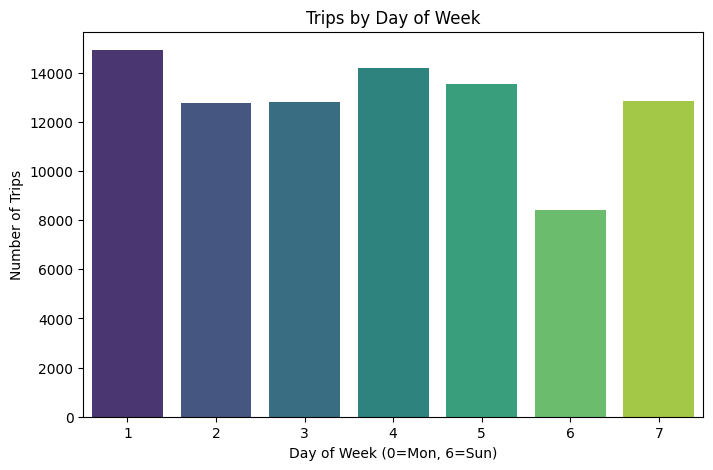

In [16]:
# Trips by Day of Week
plt.figure(figsize=(8,5))
sns.countplot(x='pickup_dayofweek', data=df, palette='viridis')
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Number of Trips')
plt.show()

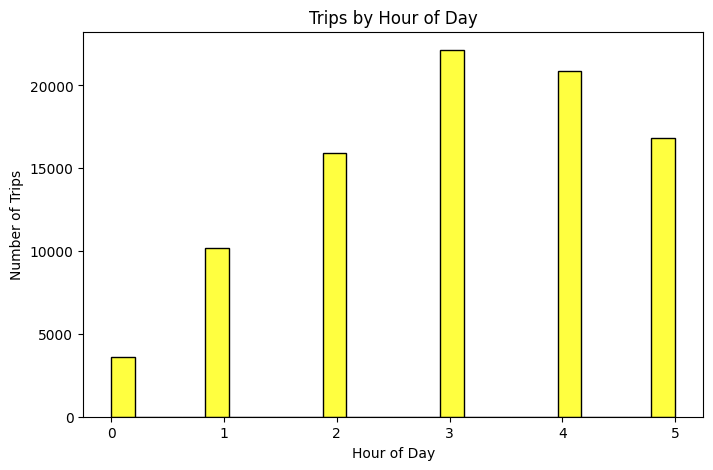

In [17]:
# Trips by Hour of Day
plt.figure(figsize=(8,5))
sns.histplot(df['pickup_time'], bins=24, kde=False, color='yellow')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

In [27]:
trips_per_month = df['pickup_month'].value_counts().sort_index()
print(trips_per_month)
print(f'Maximum trips - {max(trips_per_month)} ')

pickup_month
1    13481
2    13333
3    15546
4    14810
5    16650
6    15738
Name: count, dtype: int64
Maximum trips - 16650 


**Revenue Analysis**

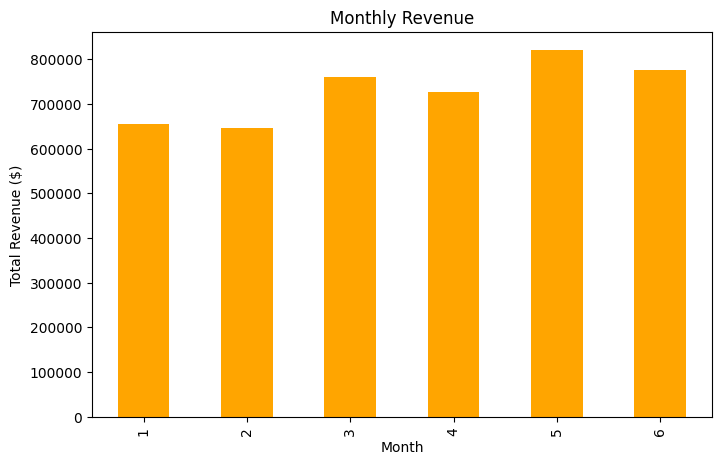

In [18]:
# Monthly Revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(8,5))
monthly_revenue.plot(kind='bar', color='orange')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.show()

In [19]:
avg_fare = df['fare_amount'].mean()
print(f"Average Fare Per Trip: ${avg_fare:.2f}")

Average Fare Per Trip: $38.40


**Location Insights**

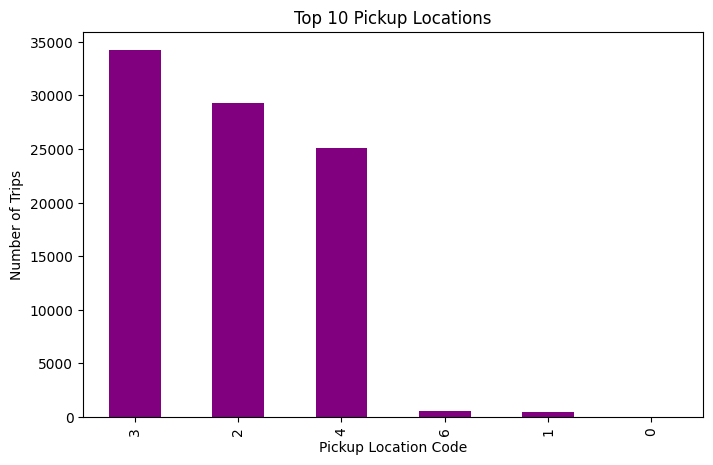

In [20]:
# Top Pickup Locations
pickup_counts = df['pickup_location_code'].value_counts().head(10)
plt.figure(figsize=(8,5))
pickup_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Pickup Location Code')
plt.ylabel('Number of Trips')
plt.show()

**Correlation heatmap**

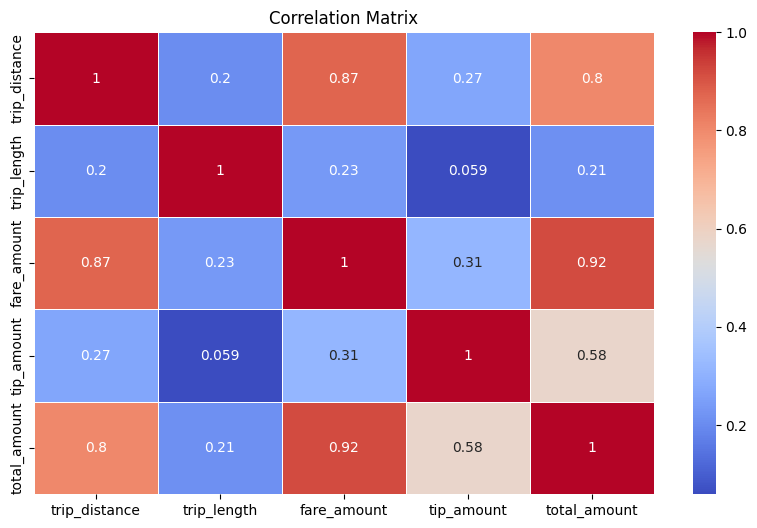

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['trip_distance', 'trip_length', 'fare_amount', 'tip_amount', 'total_amount']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()